<a href="https://colab.research.google.com/github/SainAim/DataScience/blob/main/AmySaini_MiniProject_CST2105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1 . Define the topic, purpose and parameters for the analysis.

###Topic - **Air Quality Index in India from 2015-2020**

###Purpose : 
**EXPLORATORY ANALYSIS:** To understand, clean and prepare the data. 

**DESCRIPTIVE ANALYSIS:** Find trends in the air quality of all Indian states over the last 6 years. Besides the numerical and categorical plots, I have attempted to answer some relevant questions. For ex, which are the top 10 cities with the worst AQI plotted along with the year in which they were the most affected. Another calculation is to find the worst three cities every year and then plotting the results.

**PREDECTIVE ANALYSIS :** Choose and apply the appropriate Machine Learning Algorithm and evaluate the model performance.

Data has been taken from https://www.kaggle.com/rohanrao/air-quality-data-in-india

###Parameters: 
####Below are the important terms or parameters for understanding the data:

- AQI - Air Quality Index is used by government agencies to communicate the levels of air pollution to the public. Different countries use different scales. India uses the 500 point scale which has been used in this analysis as well. 
- PM - Particulate Matter of fine inhalable particles (also called particle pollution)
- PM2.5 - PM with diameters that are generally 2.5 micrometers and smaller.
- PM10 - PM with diameters that are generally 10 micrometers and smaller.
- NO, NO2, NOx, CO, SO2 etc - Gases and pollutants in the environment.

AQI is calculated by a combination of the levels of various gases and particulate matter.
The picture below gives an idea of the index: 
(The pic has been attached with the assignment as a a JPG file)

![](https://drive.google.com/uc?export=view&id=1nK12trKLbGhp78PwNXT0kRWiz1d-kxCv)

Now, that we have established our purpose and parameters for the analysis, let's look at the quality of the dataset and clean it before the analysis.

### Step 2 . Clean the data

In [ ]:
# IMPORT THE REQUIRED LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
#UPLOAD THE DATASET

from google.colab import files
uploaded = files.upload()

Saving india_aqi.csv to india_aqi.csv


In [ ]:
# READ THE DATASET INTO A DATAFRAME

df = pd.read_csv('india_aqi.csv')

##Check a sample of the dataframe. First and last 5 rows

In [ ]:
# CHECK FIRST 5 ROWS OF THE DATAFRAME

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# CHECK LAST 5 ROWS OF THE DATAFRAME
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29532,Visakhapatnam,6/27/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29533,Visakhapatnam,6/28/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29534,Visakhapatnam,6/29/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29535,Visakhapatnam,6/30/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29536,Visakhapatnam,7/1/2020,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


###Describe the data and check its shape, info and column names

In [ ]:
#CHECK DESCRIPTIVE STATISTICS

df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24938.000000,18391.000000,25955.000000,25952.000000,25352.000000,19203.000000,27478.000000,25683.000000,25515.000000,23914.000000,21496.000000,11428.000000,24854.000000
mean,67.455378,118.127103,17.573771,28.559790,32.310282,23.483476,2.251039,14.541531,34.493716,3.280919,8.702168,3.070139,166.494971
std,64.658434,90.605110,22.784423,24.472243,31.644051,25.684275,6.967552,18.150787,21.693462,15.809629,19.971949,6.322404,140.759608
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.822500,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.870000,0.120000,0.600000,0.140000,81.000000
50%,48.580000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.597500,149.745000,19.950000,37.612500,40.122500,30.020000,1.450000,15.230000,45.580000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
# CHECK DATA SHAPE (ROWS,COLUMNS)

df.shape

(29537, 16)

In [ ]:
# CHECK INFORMATION LIKE COLUMN NAMES, TYPES, NUMBER OF NULL VALUES ETC.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29537 entries, 0 to 29536
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29537 non-null  object 
 1   Date        29537 non-null  object 
 2   PM2.5       24938 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25955 non-null  float64
 5   NO2         25952 non-null  float64
 6   NOx         25352 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27478 non-null  float64
 9   SO2         25683 non-null  float64
 10  O3          25515 non-null  float64
 11  Benzene     23914 non-null  float64
 12  Toluene     21496 non-null  float64
 13  Xylene      11428 non-null  float64
 14  AQI         24854 non-null  float64
 15  AQI_Bucket  24854 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


AQI is string, so convert it to numeric

In [ ]:
df["AQI"] = pd.to_numeric(df.AQI, errors='coerce')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True) 
#This is used to remove index ('Unnamed') from showing as one of the columns

In their as-is state let's plot a heatmap to check the relation between all parameters 

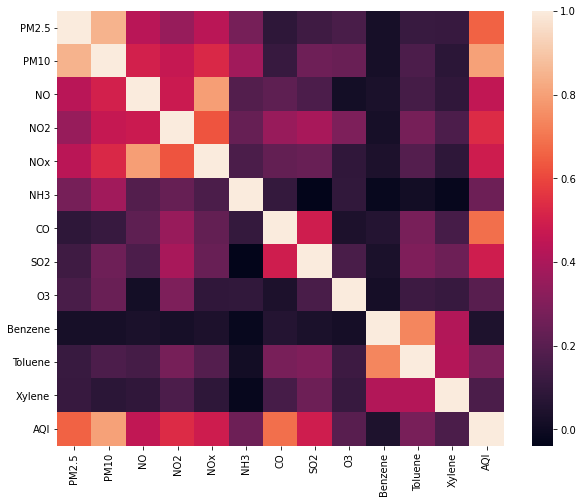

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr());
#sns.heatmap(df.corr(),annot=True)

###Check the dataframe for any duplicate values

In [ ]:
df.duplicated().value_counts()

False    29531
True         6
dtype: int64

#####Since there are 6 duplicate values, those need to be removed

In [ ]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

Let's check the duplicate count again to confirm that duplicates have been removed

In [ ]:
df.duplicated().value_counts()

False    29531
dtype: int64

#####No more duplicates!

### Handling null values

As there are some null values through all the parameters. Let's deal with those by applying imputation

Here's the df before null values are handled:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29536
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.8+ MB


Let's look at AQI data description 

In [ ]:
df['AQI'].describe()

count    24850.000000
mean       166.463581
std        140.696585
min         13.000000
25%         81.000000
50%        118.000000
75%        208.000000
max       2049.000000
Name: AQI, dtype: float64

Let's use Median to impute null values for all parameters including AQI as the data does not show any abnormal behaviour for the days when there are null values for AQI. It just seems that AQI has not been updated for those days.

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN, strategy='mean')

imputing_columns = [col for col in df.columns if col not in ['AQI_Bucket'] and df[col].dtype == np.dtype('float64')]
df[imputing_columns] = imp.fit_transform(df[imputing_columns])

Let's look at AQI once again. 

In [ ]:
df['AQI'].describe()

count    29531.000000
mean       166.463581
std        129.064348
min         13.000000
25%         88.000000
50%        138.000000
75%        179.000000
max       2049.000000
Name: AQI, dtype: float64

As we can see, the descriptive stats have not changed much after imputing null values with Median.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29536
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.8+ MB


Now there are no null values.

Let's check the correlation again

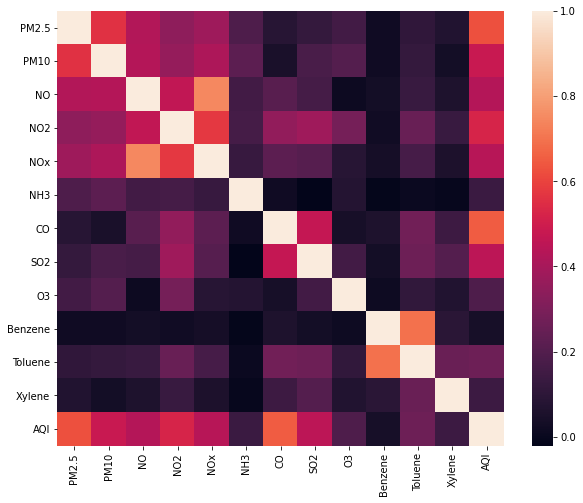

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr());
#sns.heatmap(df.corr(),annot=True)

As the main variables on which AQI seems to be dependent are NO, NO2, NOx, CO, SO2, PM2.5, PM10, let's drop the rest from the dataframe.

In [ ]:
df = df.drop(columns=['NH3','O3', 'Benzene', 'Toluene', 'Xylene','AQI_Bucket'])

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,CO,SO2,AQI
0,Ahmedabad,1/1/2015,67.450578,118.127103,0.92,18.22,17.15,0.92,27.64,166.463581
1,Ahmedabad,1/2/2015,67.450578,118.127103,0.97,15.69,16.46,0.97,24.55,166.463581
2,Ahmedabad,1/3/2015,67.450578,118.127103,17.40,19.30,29.70,17.40,29.07,166.463581
3,Ahmedabad,1/4/2015,67.450578,118.127103,1.70,18.48,17.97,1.70,18.59,166.463581
4,Ahmedabad,1/5/2015,67.450578,118.127103,22.10,21.42,37.76,22.10,39.33,166.463581


Let's plot the correlation after the extra columns have been dropped

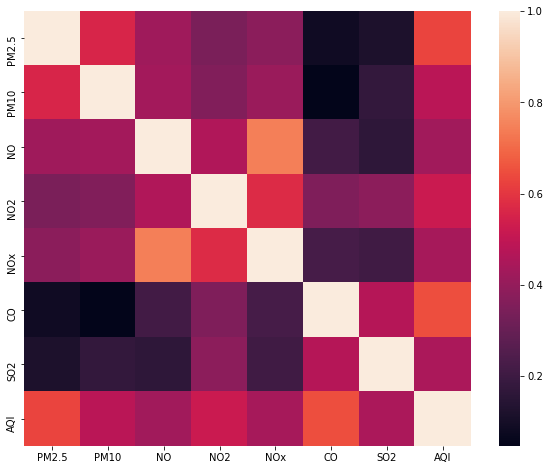

In [ ]:
plt.figure(figsize=(10,8));
sns.heatmap(df.corr());
#sns.heatmap(df.corr(),annot=True)

#####One of the column names is PM2.5. Decimal in the column name is going to create problems later so let's change it to PM25

In [ ]:
df = df.rename(columns = {'PM2.5':'PM25'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29536
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    29531 non-null  object 
 1   Date    29531 non-null  object 
 2   PM25    29531 non-null  float64
 3   PM10    29531 non-null  float64
 4   NO      29531 non-null  float64
 5   NO2     29531 non-null  float64
 6   NOx     29531 non-null  float64
 7   CO      29531 non-null  float64
 8   SO2     29531 non-null  float64
 9   AQI     29531 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.5+ MB


Let's plot a histogram to check our data distribution now

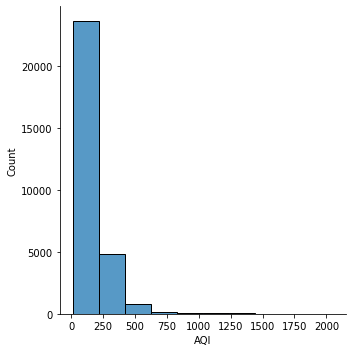

In [ ]:
sns.displot(df['AQI'],kde=False,bins=10);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


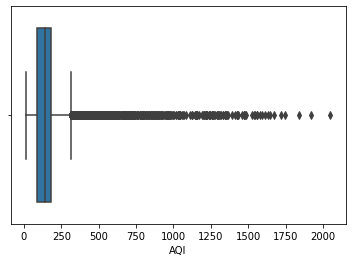

In [ ]:
sns.boxplot(df['AQI']);

This histogram shows that we have some outliers. One option is to trim them. However,any value equal to or greater than 400 on the AWI index is considered 'severely hazardous' and the international standard is capped at 500. Air monitors sometimes indicate a much higher value but those are considered outliers. So, instead of dropping the AQI values above 500, I can reassign them a value equal to 500 without compromising the data quality while maintaining data volume.
We can do the same for PM2.5 and PM 10 as both these parameters follow the same international standards.

In [ ]:
df.loc[df.AQI > 500, "AQI"] = 500
df.loc[df.PM25 > 500, "PM25"] = 500
df.loc[df.PM10 > 500, "PM10"] = 500

Let's plot the Histogram again and check if outliers are taken care of!

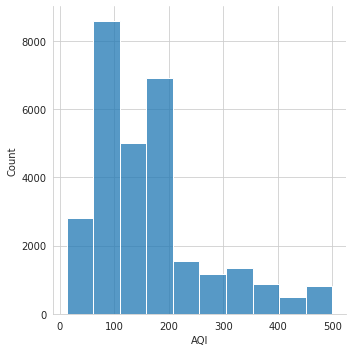

In [ ]:
sns.set_style("whitegrid")
sns.displot(df['AQI'],kde=False,bins=10);


No more outliers. Data is ready for analysis . 

First of all let's plot a countplot to check how the volume of our data is distributed and sort the categories in descending order.

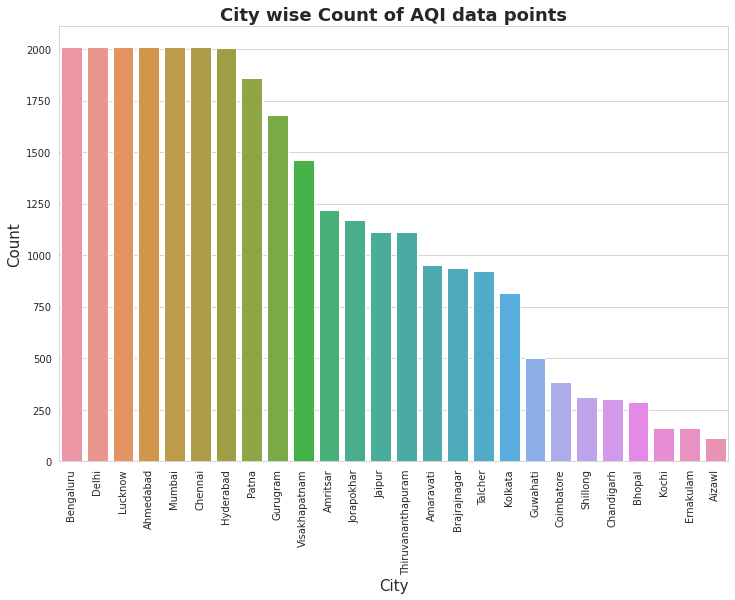

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x = 'City', data = df, order=df['City'].value_counts().index);
plt.xticks(rotation=90);
plt.title('City wise Count of AQI data points',size = 18, weight = 'bold');
plt.xlabel('City', size = 15);
plt.ylabel('Count', size = 15);


Now, let's plot a boxplot to see the city-wise concentration of AQI points.

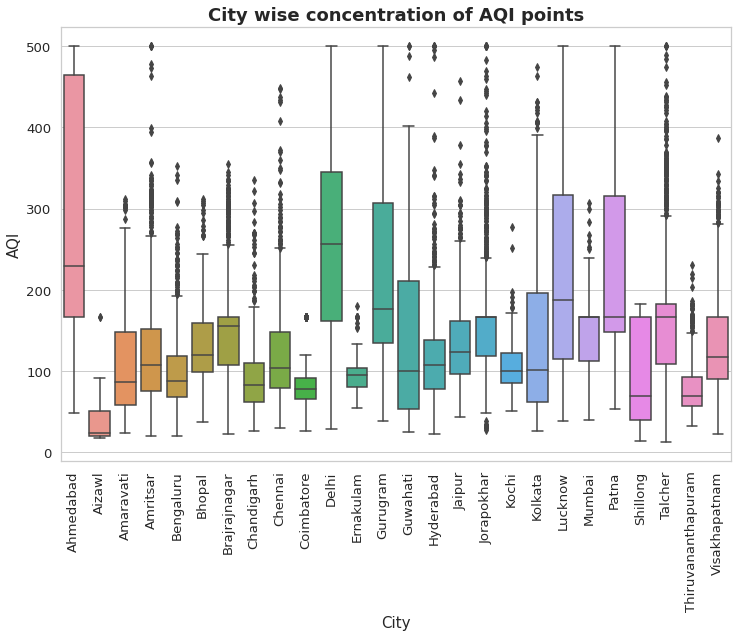

In [ ]:
sns.set_context('notebook',font_scale=1.2)
plt.figure(figsize=(12,8))

sns.boxplot(x='City',y='AQI',data = df)
plt.xticks(rotation=90);
plt.title('City wise concentration of AQI points',size = 18, weight = 'bold');
plt.xlabel('City', size = 15);
plt.ylabel('AQI', size = 15);

Let's plot a scatterplot to check the relation between AQI and the top three correlated parameters.

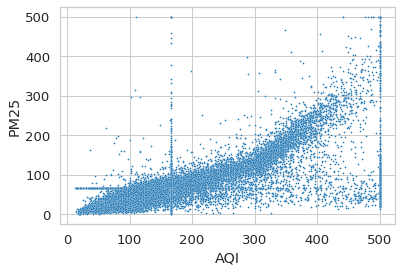

In [ ]:
sns.scatterplot(data = df, x = "AQI",y="PM25",s=3);


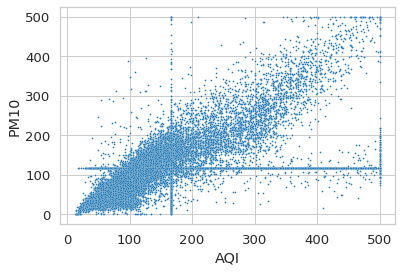

In [ ]:
sns.scatterplot(data = df, x = "AQI",y="PM10",s=3);


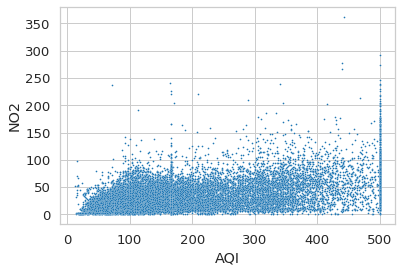

In [ ]:
sns.scatterplot(data = df, x = "AQI",y="NO2",s=3);

This provides a good insight. All three of the top parameters have a different correlation with AQI. So, let's go ahead and plot a pairplot to understand the relation between each of the key columns. Pairplots are useful when we have many variable on which our dependent variable relies.

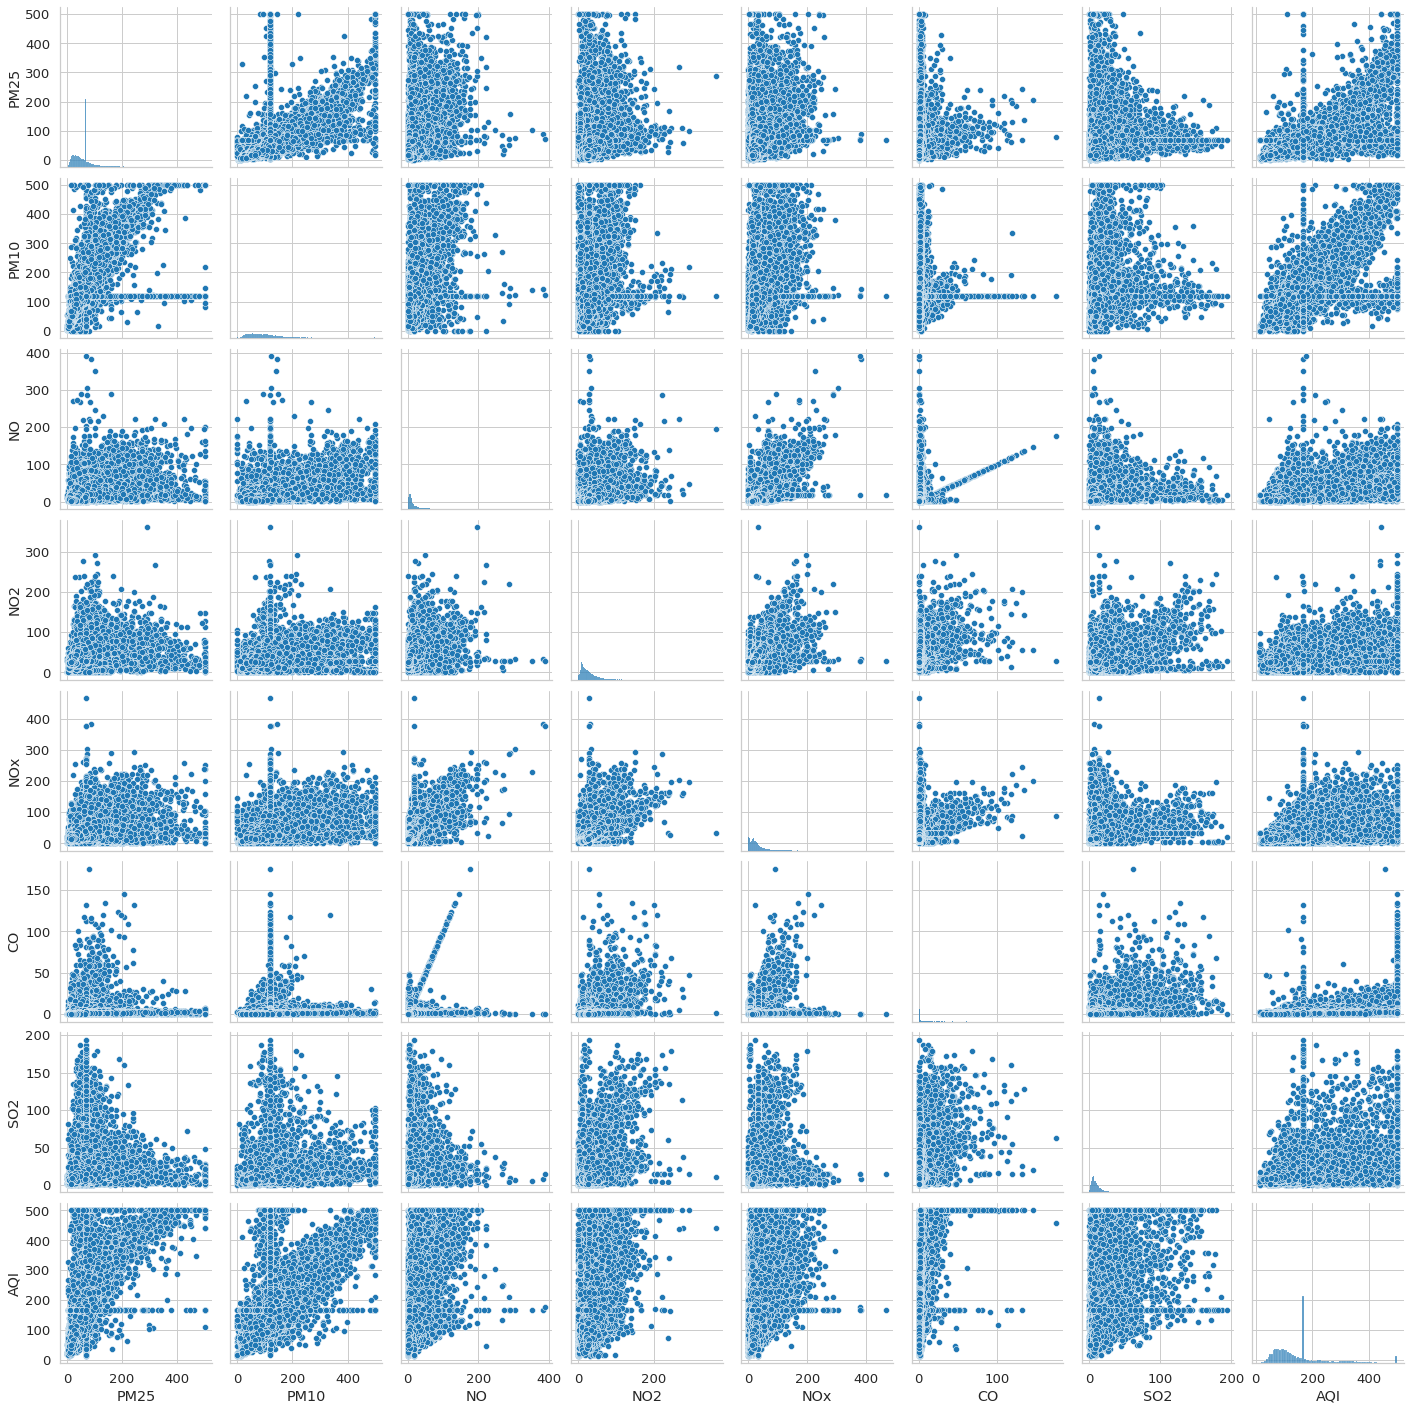

In [ ]:
sns.pairplot(df);
sns.set_style("whitegrid")


The pairplot above shows histograms for each of the parameters as well as shows scatter plots for every possible combination between these parameters. This provides a great understanding of the correlation between each of the parameters.


###Step 3. Descriptive Analysis

#####Before we begin Descriptive Analysis, let' extract 'Year', 'Month' and 'WeekOfYear' from 'Date' column as these would be required in Descriptive Analysis

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['WeekOfYear'] = pd.DatetimeIndex(df['Date']).weekofyear
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29536
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM25        29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   CO          29531 non-null  float64
 8   SO2         29531 non-null  float64
 9   AQI         29531 non-null  float64
 10  Year        29531 non-null  int64  
 11  WeekOfYear  29531 non-null  int64  
 12  Month       29531 non-null  int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 4.4+ MB


Data type for 'Year', 'Month' and 'WeekOfYear' should  be changed from integer to string

In [ ]:
df.Year = df.Year.astype('str')
df.WeekOfYear = df.WeekOfYear.astype('str')
df.Month = df.Month.astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29536
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM25        29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   CO          29531 non-null  float64
 8   SO2         29531 non-null  float64
 9   AQI         29531 non-null  float64
 10  Year        29531 non-null  object 
 11  WeekOfYear  29531 non-null  object 
 12  Month       29531 non-null  object 
dtypes: float64(8), object(5)
memory usage: 4.4+ MB


### Next, let's plot a simple line chart to check the average AQI in India over the last 6 years.

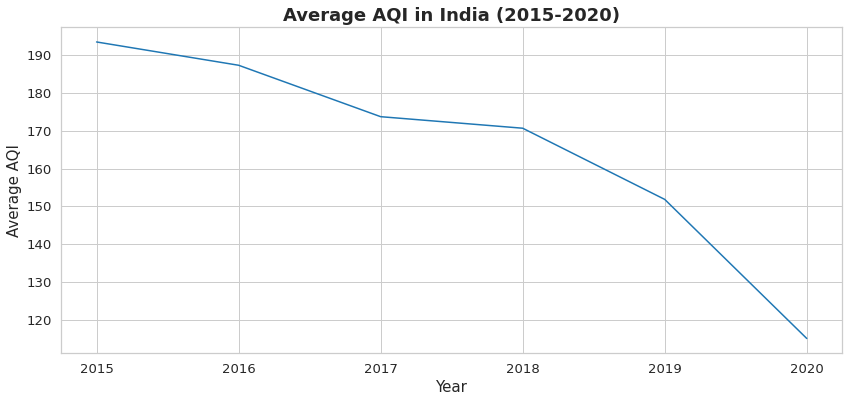

In [ ]:
sns.set_style("whitegrid")
india_avg_aqi = df.groupby('Year')['AQI'].mean().plot(figsize=(14,6)); 
plt.title('Average AQI in India (2015-2020)',size = 18, weight = 'bold');
plt.xlabel('Year', size = 15);
plt.ylabel('Average AQI', size = 15);


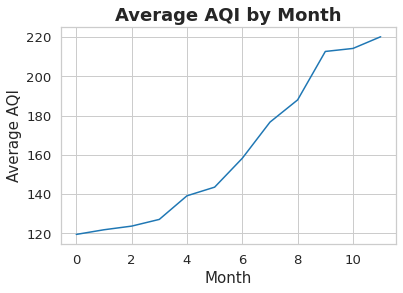

In [ ]:
sns.set_style("whitegrid")
india_avg_aqi_Month = df.groupby('Month')['AQI'].mean(); 
india_avg_aqi_Month.sort_values().plot(use_index=False)
plt.title('Average AQI by Month',size = 18, weight = 'bold');
plt.xlabel('Month', size = 15);
plt.ylabel('Average AQI', size = 15);

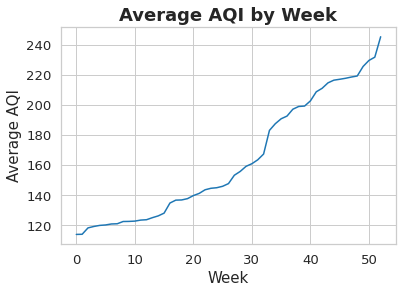

In [ ]:
sns.set_style("whitegrid")
india_avg_aqi_Week = df.groupby('WeekOfYear')['AQI'].mean(); 
india_avg_aqi_Week.sort_values().plot(use_index=False)
plt.title('Average AQI by Week',size = 18, weight = 'bold');
plt.xlabel('Week', size = 15);
plt.ylabel('Average AQI', size = 15);

The average line chart of the entire country does not provide much information as India is a large country and AQI levels may widely differ. So, let's do some analysis at the city level. Instead of just making a line chart for every city, let's look at some specific questions:

### Question - Find the worst hit city for each year in the last 6 years

Prepare The Dataframe To Answer The Question Above

In [ ]:
df_meanaqi = df.groupby(['Year','City']).agg({'AQI' :'mean'})
worst_aqi = df_meanaqi.sort_values(['Year','AQI'],ascending=False)
worst_aqi

AQI
Year City                 
2020 Ahmedabad  212.837405
     Delhi      181.672131
     Patna      162.251366
     Talcher    161.543807
     Guwahati   161.508197
...                    ...
2015 Gurugram   166.463581
     Mumbai     166.463581
     Chennai    152.754134
     Hyderabad  148.698128
     Bengaluru  124.237323

[103 rows x 1 columns]

Sort The Calculation To Find The Top 10 Cities With Worst Air Quality Over 6 Years.
This calculation will pick the top 10 affected cities from all of these years and provide year as well as AQI data for that city.

In [ ]:
worst10=df_meanaqi.sort_values(by=['AQI','Year','City'],ascending=False).head(10)
worst10

AQI
Year City                 
2018 Ahmedabad  436.990983
2019 Ahmedabad  404.008292
2016 Delhi      297.260829
2015 Delhi      297.024658
2017 Gurugram   270.064901
     Delhi      252.594992
2015 Ahmedabad  250.439138
2018 Delhi      248.367123
2016 Patna      242.489687
2017 Lucknow    236.688742

Plot This Calculation

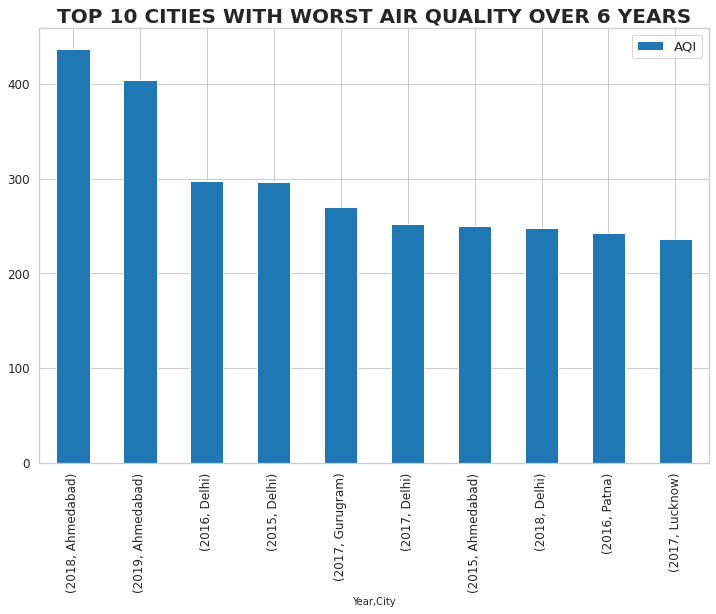

In [ ]:
sns.set_style("whitegrid")
worst10.plot(kind='bar',figsize=(12,8));
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);
plt.title("TOP 10 CITIES WITH WORST AIR QUALITY OVER 6 YEARS",size = 20, weight = 'bold');
plt.xlabel('Year,City', size = 10);

#Challenge Exercise

This is better but the above plot is still not very  helpful as it is not grouped properly. As a challenge, let us try to group the top 3 cities with the highest AQI per year over the last 6 years. This would give us an insight as to how the level of pollution has fared in the country by taking into account the 3 most affected cities.


In [ ]:
# Grouping the top 3 cities per year with the highest AQI Values

worst_aqi_top3 = (worst_aqi['AQI'].groupby('Year', group_keys=False))
worst_aqi_top3
list(worst_aqi_top3)
top3_year=worst_aqi_top3.nlargest(3)
top3_year

Year  City     
2015  Delhi        297.024658
      Ahmedabad    250.439138
      Patna        235.708674
2016  Delhi        297.260829
      Patna        242.489687
      Lucknow      235.718127
2017  Gurugram     270.064901
      Delhi        252.594992
      Lucknow      236.688742
2018  Ahmedabad    436.990983
      Delhi        248.367123
      Lucknow      233.772603
2019  Ahmedabad    404.008292
      Delhi        230.720548
      Patna        216.785703
2020  Ahmedabad    212.837405
      Delhi        181.672131
      Patna        162.251366
Name: AQI, dtype: float64

In [ ]:
# Converting series to dataframe
df_top_3=pd.DataFrame()
df_final=df_top_3.append(top3_year)
df_final

,"(2015, Delhi)","(2015, Ahmedabad)","(2015, Patna)","(2016, Delhi)","(2016, Patna)","(2016, Lucknow)","(2017, Gurugram)","(2017, Delhi)","(2017, Lucknow)","(2018, Ahmedabad)","(2018, Delhi)","(2018, Lucknow)","(2019, Ahmedabad)","(2019, Delhi)","(2019, Patna)","(2020, Ahmedabad)","(2020, Delhi)","(2020, Patna)"
AQI,297.024658,250.439138,235.708674,297.260829,242.489687,235.718127,270.064901,252.594992,236.688742,436.990983,248.367123,233.772603,404.008292,230.720548,216.785703,212.837405,181.672131,162.251366


In [ ]:
# Transposing data so that it is more readable
final2=df_final.transpose()
final2

,AQI
"(2015, Delhi)",297.024658
"(2015, Ahmedabad)",250.439138
"(2015, Patna)",235.708674
"(2016, Delhi)",297.260829
"(2016, Patna)",242.489687
"(2016, Lucknow)",235.718127
"(2017, Gurugram)",270.064901
"(2017, Delhi)",252.594992
"(2017, Lucknow)",236.688742
"(2018, Ahmedabad)",436.990983


In [ ]:
# Resetting the index since (Year,City) is currently as index. When we reset the
# the index the old index is added as a column and new sequenial index is used.
# inplace = forms a new column with (Year,City) tilted 'Index'.
final2.reset_index(inplace=True) 

# Replacing "Index" with "YC" as header.
final2 = final2.rename(columns = {'index':'YC'})

# Assiging type of data to "YC"
final2.YC=final2.YC.astype(str)

# Stripping unnecessary data from YC
final2['YC'] = final2['YC'].str.strip('()')
final2.info()
final2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YC      18 non-null     object 
 1   AQI     18 non-null     float64
dtypes: float64(1), object(1)
memory usage: 416.0+ bytes


,YC,AQI
0,"'2015', 'Delhi'",297.024658
1,"'2015', 'Ahmedabad'",250.439138
2,"'2015', 'Patna'",235.708674
3,"'2016', 'Delhi'",297.260829
4,"'2016', 'Patna'",242.489687
5,"'2016', 'Lucknow'",235.718127
6,"'2017', 'Gurugram'",270.064901
7,"'2017', 'Delhi'",252.594992
8,"'2017', 'Lucknow'",236.688742
9,"'2018', 'Ahmedabad'",436.990983


In [ ]:
# Splitting column Info
# "Temp_DF" new data frame with split value columns is formed.
Temp_DF=final2["YC"].str.split(",", n = 1, expand = True) 

# making separate "Year" column from new data frame 
final2["Year"]= Temp_DF[0] 
  
# making separate "City" column from new data frame 
final2["City"]= Temp_DF[1] 
  
# Dropping old Name columns 
final2.drop(columns =["YC"], inplace = True) 
final2

,AQI,Year,City
0,297.024658,'2015','Delhi'
1,250.439138,'2015','Ahmedabad'
2,235.708674,'2015','Patna'
3,297.260829,'2016','Delhi'
4,242.489687,'2016','Patna'
5,235.718127,'2016','Lucknow'
6,270.064901,'2017','Gurugram'
7,252.594992,'2017','Delhi'
8,236.688742,'2017','Lucknow'
9,436.990983,'2018','Ahmedabad'


In [ ]:
# Stripping unnecessary data from column Year.
final2['Year'] = final2['Year'].str.strip("'")
final2

,AQI,Year,City
0,297.024658,2015,'Delhi'
1,250.439138,2015,'Ahmedabad'
2,235.708674,2015,'Patna'
3,297.260829,2016,'Delhi'
4,242.489687,2016,'Patna'
5,235.718127,2016,'Lucknow'
6,270.064901,2017,'Gurugram'
7,252.594992,2017,'Delhi'
8,236.688742,2017,'Lucknow'
9,436.990983,2018,'Ahmedabad'


In [ ]:
# Assigning datatype to round off float values
final2.Year=final2.Year.astype(int)
final2.AQI=final2.AQI.astype(int)
final2

,AQI,Year,City
0,297,2015,'Delhi'
1,250,2015,'Ahmedabad'
2,235,2015,'Patna'
3,297,2016,'Delhi'
4,242,2016,'Patna'
5,235,2016,'Lucknow'
6,270,2017,'Gurugram'
7,252,2017,'Delhi'
8,236,2017,'Lucknow'
9,436,2018,'Ahmedabad'


In [ ]:
# We can "pivot" the data to support the desired plotting output. Here we set 
# the rows as Year, columns as City, and values as AQI.
pivot = pd.pivot_table(data=final2, index='Year',columns='City',values='AQI')
pivot

City,'Ahmedabad','Delhi','Gurugram','Lucknow','Patna'
Year,,,,,
2015,250.0,297.0,NaN,NaN,235.0
2016,NaN,297.0,NaN,235.0,242.0
2017,NaN,252.0,270.0,236.0,NaN
2018,436.0,248.0,NaN,233.0,NaN
2019,404.0,230.0,NaN,NaN,216.0
2020,212.0,181.0,NaN,NaN,162.0


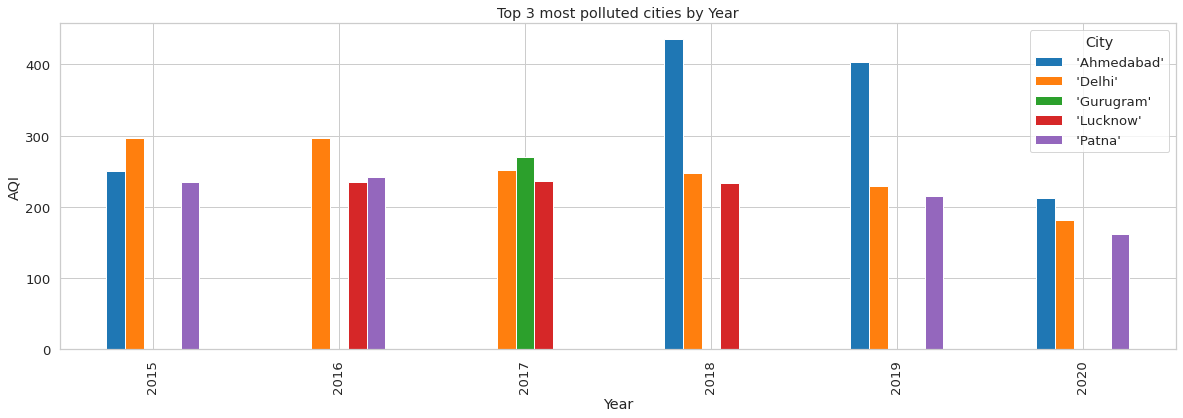

In [ ]:
# Now we can plot the desired result
sns.set_style("whitegrid")
pivot.plot.bar(xlabel='Year', ylabel='AQI', figsize=(20,6), title="Top 3 most polluted cities by Year")

###Step 4 Predictive Analysis

#MACHINE LEARNING ALGORITHM APPLICATION


####Choose your model

####Since we are dealing with CONTINUOUS, REAL and NUMERIC data using multiple independent variables, let's build and train a 
###MULTIPLE LINEAR REGRESSION MODEL

Let's start by looking at dataframe head. Always a good idea to take a look and see if everything is still in order.

In [ ]:
df.head()

,City,Date,PM25,PM10,NO,NO2,NOx,CO,SO2,AQI,Year,WeekOfYear,Month
0,Ahmedabad,1/1/2015,67.450578,118.127103,0.92,18.22,17.15,0.92,27.64,166.463581,2015,1,1
1,Ahmedabad,1/2/2015,67.450578,118.127103,0.97,15.69,16.46,0.97,24.55,166.463581,2015,1,1
2,Ahmedabad,1/3/2015,67.450578,118.127103,17.40,19.30,29.70,17.40,29.07,166.463581,2015,1,1
3,Ahmedabad,1/4/2015,67.450578,118.127103,1.70,18.48,17.97,1.70,18.59,166.463581,2015,1,1
4,Ahmedabad,1/5/2015,67.450578,118.127103,22.10,21.42,37.76,22.10,39.33,166.463581,2015,2,1


##Arrange data into Features Matrix and Target Vector
AQI is dependent on all other parameters, but vice-versa is not true, so following are our X and y

###X = PM25, PM10, NO, NO2, NOx, CO, SO2   (Features Matrix)
###y = AQI          (Target Vector)

In [ ]:
X = df.loc[:,['PM25','PM10','NO', 'NO2', 'NOx', 'CO', 'SO2']].values
y = df.loc[:,'AQI'].values

In [ ]:
X

array([[ 67.45057795, 118.12710293,   0.92      , ...,  17.15      ,
          0.92      ,  27.64      ],
       [ 67.45057795, 118.12710293,   0.97      , ...,  16.46      ,
          0.97      ,  24.55      ],
       [ 67.45057795, 118.12710293,  17.4       , ...,  29.7       ,
         17.4       ,  29.07      ],
       ...,
       [ 22.91      ,  65.73      ,   3.45      , ...,  18.33      ,
          0.48      ,   8.42      ],
       [ 16.64      ,  49.97      ,   4.05      , ...,  18.8       ,
          0.52      ,   9.84      ],
       [ 15.        ,  66.        ,   0.4       , ...,  14.05      ,
          0.59      ,   2.1       ]])

In [ ]:
y

array([166.46358149, 166.46358149, 166.46358149, ...,  68.        ,
        54.        ,  50.        ])

## Split the dataset into Training set and Test set.
 A standard size for test set is 20-30%. Let's keep ours 30%
 Import and run the required function from scikit learn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

##Train the Multiple Linear Regression model on the Training set

Import LinearRegression library from scikit learn

In [ ]:
from sklearn.linear_model import LinearRegression

Create an instance of the class LinearRegression
This instance or object will create the Linear Regression Model

In [ ]:
model = LinearRegression()

Now, the model has been created. Next step is to train it. To do so, we need to call the method fit on our model 

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check the R squared, intercept and slope. 

In [ ]:
r_sq = model.score(X, y)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.7812488947569389


Coefficient of determination explains how much percentage of the data points fit close to the regression line. Generally, anything above 0.5 is a good fit

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 23.43306346282725


Intercept is the value of the predicted response(y) when 𝑥₁ = 𝑥₂ = 0. 

In [ ]:
print('slope:', model.coef_)

slope: [ 1.03999173  0.30859833 -0.21518444  0.33291895  0.14632363  4.65130434
  0.74987119]


Slope is an array containing coefficients for all variables in the Features Matrix. The increase of variable value by 1 unit yields the rise of the predicted response by coefficient value. 

##Predict the test set. 
This will generate predicted values of AQI for test set

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([379.59164352, 169.09029796, 158.86486401, ...,  91.59678052,
       161.84512376, 219.00583375])

Those were the predicted values. Now, let's check the actual values from the test set before we compare the two and see how well our model has fared in predicting the AQI

In [ ]:
y_test

array([332.        , 127.        , 166.46358149, ...,  86.        ,
       166.46358149, 220.        ])

## Step 5 Evaluation

Let's compare the predicted and actual values from the test set by using yellowbrick Regression evaluation techniques - Prediction Error plot.



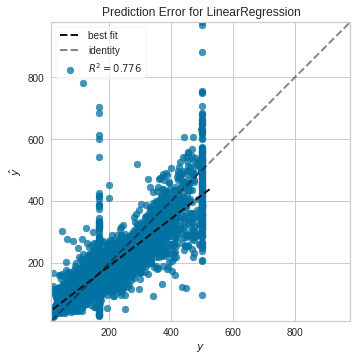

Coefficient is  0.7755809317566973


In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
c_score = visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
print("Coefficient is ",c_score)

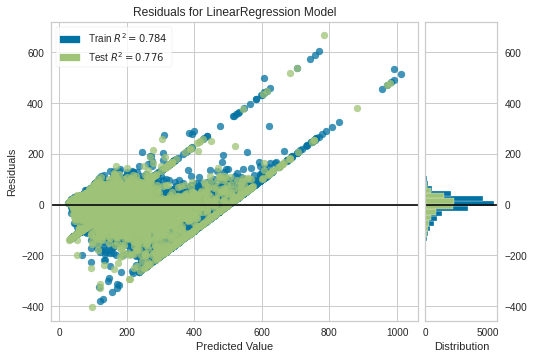

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model, hist=True)
#residual = y_pred - y_test
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

The prediction exactly matches the model at the line. Score specifies the goodness of fit of the underlying regression model to the test data. This seems to be a good fit!!